# 出題内容
y = ax^2 + bx + c
この関数が極値を取るx座標を求める関数を作成せよ

## 解説
あらゆる関数は微分係数が0になる点で極値を取る。従って、「1階微分した関数が0となるxを求める」という、ニュートン法の問題に落とし込むことができる。この問題に対しては、

* n次関数は解析的な微分が簡単なので、微分する関数を定義する方法（解析解を使って計算する方法）
* 予めcalc_newton()に渡す関数を導関数にして渡す方法（数値解としてニュートン法を適用する方法）

の2通りのアプローチがあり得る。

<IPython.core.display.Javascript object>


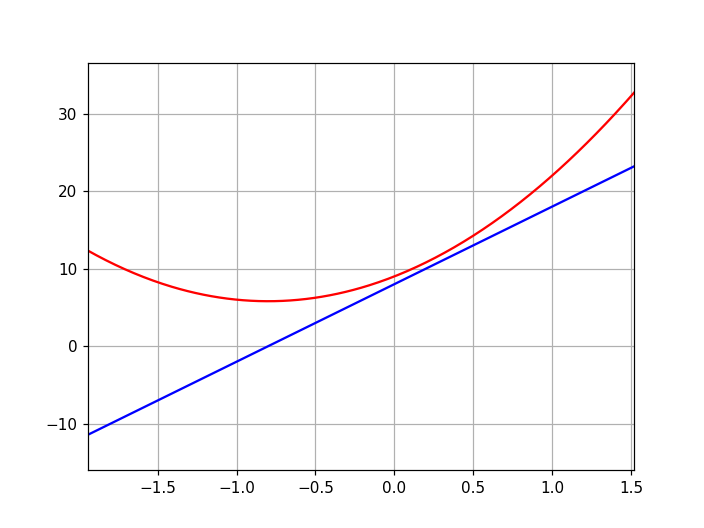

-0.8 2


-0.8

In [2]:
# 解答例　その1
# n次関数は解析的な微分が簡単なので、微分する関数を定義する方法
# より正確な解が求まるが、複雑かもしれない。
# やや複雑ではあるが、n次関数に対する広範な対応力がある。
import matplotlib.pyplot as plt
import numpy as np

# jupyter notebookでしか通用しないが、グラフを拡大・移動するための制御命令
%matplotlib notebook


def get_diff_cof(cof):
    """ n次関数の1階微分後の係数を返す
    cof: list, n次関数の係数を格納したlist型変数。例えば、3x^2 + 5x + 7なら、[7, 5, 3]を渡すこと
    """
    ans = []
    for i in range(1, len(cof)):
        ans.append(cof[i] * i)
    return ans


def nth_func(a, x):
    """ n次関数の値を返す
    a: list, n次関数の係数を格納したlist型変数。例えば、3x^2 + 5x + 7なら、[7, 5, 3]を渡すこと
    x: n次関数のxの値
    """
    y = 0
    for i in range(len(a)):
        y += a[i] * x**i
    return y


# 係数を定義（値はテキトー）
a, b, c = 5, 8, 9    # ax^2 + bx + cの係数を代入
c = [c, b, a]        # 係数をlistに格納

# 元の関数のグラフを描画
x = np.arange(-10, 10, 0.01) # 描画領域となるxをndarray型で用意
y = nth_func(c, x)           # n次関数の値を求める（結果はndarray型になる）
plt.plot(x, y, c="red")

# 微分後の関数のグラフを描画する。今度のグラフは微分して次数が減ったグラフになっているはずだ
c = get_diff_cof(c) # 微分したあとの係数を求める
y = nth_func(c, x)  # n次関数の値を求める（結果はndarray型になる）
plt.plot(x, y, c="blue")
plt.grid()
plt.show()


def my_func(x):           # n次関数の係数を格納したcが既に微分されたものに置換されていれば、1階微分した関数の値を返す
    return nth_func(c, x) # この関数内にはcは定義されていないので、外のスコープで定義されたcが使われる。xは引数で渡した値が使われる（ちょっと、いい書き方ではないのだが）
    
def diff(func, x, dx): # funcは微分したい方程式の値を返す関数
    return (func(x + dx) - func(x)) / dx

def calc_newton(func, x_init, dx): # 汎用ニュートン法で解を求める関数
    x = x_init
    y = float("inf")
    count = 0
    e = 1.0

    while abs(y) > 0.01 and count < 1000 and e > 0.00001:
        y = func(x)
        dydx = diff(func, x, dx)
        new_x = -y / dydx + x
        e = abs(new_x - x) / (abs(x) + 0.0000000001)
        x = new_x
        count += 1

    print(x, count) # 使う時にはコメントアウトした方が良い
    return x


calc_newton(my_func, 100, 0.01) # 極値が求まる


↑二次関数（赤）を微分して、一次関数（青）が求まっていることが分かる。

In [3]:
# 解答例　その2
# 予めcalc_newton()に渡す関数を導関数にして渡す方法
# 簡単だし、n次関数以外でも対応が可能である。
# ただし、解析解を用いていないのでやや誤差がある。
import matplotlib.pyplot as plt
import numpy as np

# jupyter notebookでしか通用しないが、グラフを拡大・移動するための制御命令
%matplotlib notebook


def my_func(x):
    a, b, c = 5, 8, 9    # ax^2 + bx + cの係数を代入。値はテキトー
    return a * x**2 + b * x + c
    
def diff(func, x, dx): # funcは微分したい方程式の値を返す関数
    return (func(x + dx) - func(x)) / dx

def first_derivative(x): # 一次導関数
    return diff(my_func, x, 0.001)
    

def calc_newton(func, x_init, dx): # 汎用ニュートン法で解を求める関数
    x = x_init
    y = float("inf")
    count = 0
    e = 1.0

    while abs(y) > 0.01 and count < 1000 and e > 0.00001:
        y = func(x)
        dydx = diff(func, x, dx)
        new_x = -y / dydx + x
        e = abs(new_x - x) / (abs(x) + 0.0000000001)
        x = new_x
        count += 1

    print(x, count) # 使う時にはコメントアウトした方が良い
    return x


calc_newton(first_derivative, 100, 0.01) # 極値が求まる

-0.8005000000000422 2


-0.8005000000000422